In [8]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Masking,Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,MaxPooling1D, Flatten, Conv1D,Conv2D,Dropout, MaxPooling2D # for creating layers inside the Neural Network
from keras.optimizers import Adam , SGD
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version
from matplotlib import pyplot as plt

#file accessing
import os
# time stuff
from datetime import timedelta
import calendar


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.4
sklearn: 1.1.1
plotly: 5.9.0


In [9]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  #epochs.remove(max(epochs))
  
  #rmse.drop(max(rmse))
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


##### Read from file and establish dataframe and future functions

In [10]:
df=pd.read_csv('InSAR_data_south/displacement/export_dataframe1.csv')
df=df.set_index([df.columns[0],df.columns[1]])
df.columns=pd.to_datetime(df.columns, format='%Y%m%d')
df=df.dropna(axis=0, how='all')#drop full nan rows

##### Remove next line to include all data

In [11]:
df=df.iloc[500000:510000] #cuts data to long 120-119 approx
df

2014-11-08  2014-12-02  2014-12-26  2015-02-12  \
Longitude Latitude                                                   
-119.9868 37.4636          0.0     -1.2784     -2.4956    1.639600   
          37.4656          0.0     -1.2967     -2.4364    1.760800   
          37.4676          0.0     -1.3893     -2.5015    1.738100   
          37.4696          0.0     -1.4200     -2.5705    1.579300   
          37.4736          0.0     -1.3715     -2.6436    1.515500   
          37.4756          0.0     -1.3809     -2.6857    1.476900   
          37.4776          0.0     -1.2581     -2.7321    1.353100   
          37.4816          0.0     -1.2527     -2.7876    1.312300   
          37.4856          0.0     -1.3273     -2.7952    1.243900   
          37.4876          0.0     -1.2918     -2.8220    1.249200   
          37.4896          0.0     -1.2666     -2.8077    1.192900   
          37.4916          0.0     -1.1770     -2.5810    1.448900   
          37.4936          0.0     -1.3326     -2.6857    1.392800   
          37.4956          0.0     -1.3295     -2.6182    1.485600   
          37.4976          0.0     -1.3302     -2.7114    1.354700   
          37.4996          0.0     -1.4077     -2.8222    1.244300   
          37.5016          0.0     -1.3736     -2.8079    1.243900   
          37.5036          0.0     -1.3740     -2.8090    1.255100   
          37.5056          0.0     -1.3754     -2.8258    1.203400   
          37.5076          0.0     -1.3691     -2.7747    1.288400   
          37.5096          0.0     -1.3316     -2.7577    1.187000   
          37.5116          0.0     -1.3031     -2.7857    1.125600   
          37.5136          0.0     -1.3092     -2.7262    1.248300   
          37.5156          0.0     -1.3178     -2.6475    1.285400   
          37.5176          0.0     -1.3452     -2.6393    1.130100   
          37.5196          0.0     -1.3504     -2.5614    1.102400   
          37.5216          0.0     -1.3535     -2.4885    0.967600   
          37.5256          0.0     -1.3755     -2.3093    0.780290   
          37.5276          0.0     -1.4163     -2.3027    0.461840   
          37.5296          0.0     -1.4042     -2.1664    0.685690   
          37.5316          0.0     -1.4094     -2.3181    0.479460   
          37.5356          0.0     -1.4497     -2.3404    0.141820   
          37.5376          0.0     -1.5105     -2.3502    0.123170   
          37.5396          0.0     -1.5333     -2.4165    0.020842   
          37.5416          0.0     -1.5139     -2.2780    0.212910   
          37.5456          0.0     -1.5926     -2.1556    0.394890   
          37.5476          0.0     -1.5720     -2.2754   -0.055695   
          37.5496          0.0     -1.5694     -2.2186   -0.235010   
          37.5516          0.0     -1.5844     -2.1477   -0.279530   
          37.5536          0.0     -1.6222     -2.2922   -0.538880   
          37.5556          0.0     -1.6157     -2.2514   -0.263360   
          37.5576          0.0     -1.5519     -2.2249   -0.360170   
          37.5656          0.0     -1.4434     -2.2378   -0.574690   
          37.5676          0.0     -1.3906     -2.2166   -0.468300   
          37.5696          0.0     -1.4096     -2.1362   -0.385330   
          37.5716          0.0     -1.3673     -1.9268   -0.260910   
          37.5736          0.0     -1.3711     -1.8671   -0.324440   
          37.5776          0.0     -1.3931     -1.8436   -0.405600   
          37.5796          0.0     -1.3553     -1.8384   -0.372780   
          37.5816          0.0     -1.2897     -1.8482   -0.539920   

                    2015-03-08  2015-04-01  2015-04-25  2015-05-19  \
Longitude Latitude                                                   
-119.9868 37.4636      -3.4272     -3.0192   -0.143220    -0.15121   
          37.4656      -3.2960     -2.9787   -0.353610    -0.28092   
          37.4676      -3.3539     -3.0604    0.264930    -0.33472   
          37.4696      -3.469

# Timestep

In [12]:
timestep=10

# Shaping function (remove start and step for first for loop to include all data)

In [13]:
def shaping(datain, timestep):
    #print(arr)
    cnt=0
    datain=datain.T.fillna(datain.mean(axis=1)).T
    for row in range(0,len(datain.index),1750): #picks a row at every iteration, allows to reduction of input and inclusion of multiple time series, remove start and step to run on full dataset 
    # Convert input dataframe to array and flatten
        arr=datain.iloc[row].to_numpy().flatten() # flatten row
         #Find indices that you need to replace
        
        #arr[np.isnan(arr)] = 
        for mth in range(0, len(datain.columns)-(2*timestep)+1): # Define range lenght of the dates - 2* amount of timesep?? +1
            cnt=cnt+1 # Gives us the number of samples. Later used to reshape the data
            X_start=mth # Start month for inputs of each sample
            X_end=mth+timestep # End month for inputs of each sample
            Y_start=mth+timestep # Start month for targets of each sample. Note, start is inclusive and end is exclusive, that's why X_end and Y_start is the same number
            Y_end=mth+2*timestep # End month for targets of each sample.  
            
            # Assemble input and target arrays containing all samples
            if cnt==1:
                X_comb=arr[X_start:X_end]
                Y_comb=arr[Y_start:Y_end]
            else: 
                X_comb=np.append(X_comb, arr[X_start:X_end])
                Y_comb=np.append(Y_comb, arr[Y_start:Y_end])
    
    # Reshape input and target arrays
    X_out=np.reshape(X_comb, (cnt, timestep, 1))
    Y_out=np.reshape(Y_comb, (cnt, timestep, 1))
    return X_out, Y_out

##### Step 2 - Split and Shape data

In [14]:
#train, test = train_test_split(df, test_size=0.2)
# creates sequences to train
#Need to decide on how to deal with rows with nans in them
X , Y = shaping(datain=df, timestep= timestep )
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=28)
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_train.shape
Y_train = Y_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
nsamples, nx, ny = Y_test.shape
Y_test = Y_test.reshape((nsamples,nx*ny))

##### Step 3 - Specify the structure of a Neural Network, first model

In [15]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 100, random_state = 0)

# Fitting the Random Forest Regression model to the data


##### Train model

In [16]:

history=model.fit(X_train, Y_train)


##### Step 4 - Plot loss over epochs

In [17]:
# Predicting the target values of the test set
Y_pred = model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(Y_test, Y_pred)), '.3f'))
print("\nRMSE: ", rmse)



RMSE:  0.577


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Mean Absolute Error: 0.33333187626566585
Mean Squared Error: 0.33298971096859475
Root Mean Squared Error: 0.5770526067600724


In [19]:
# Calculate the absolute errors
errors = abs(Y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.33 degrees.
Accuracy: 90.73 %.


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


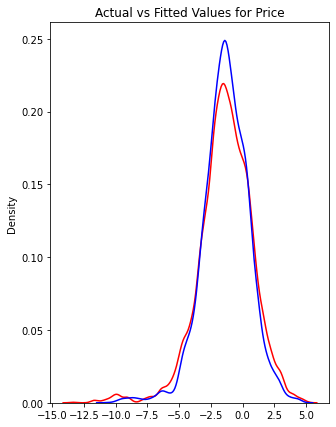

In [20]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

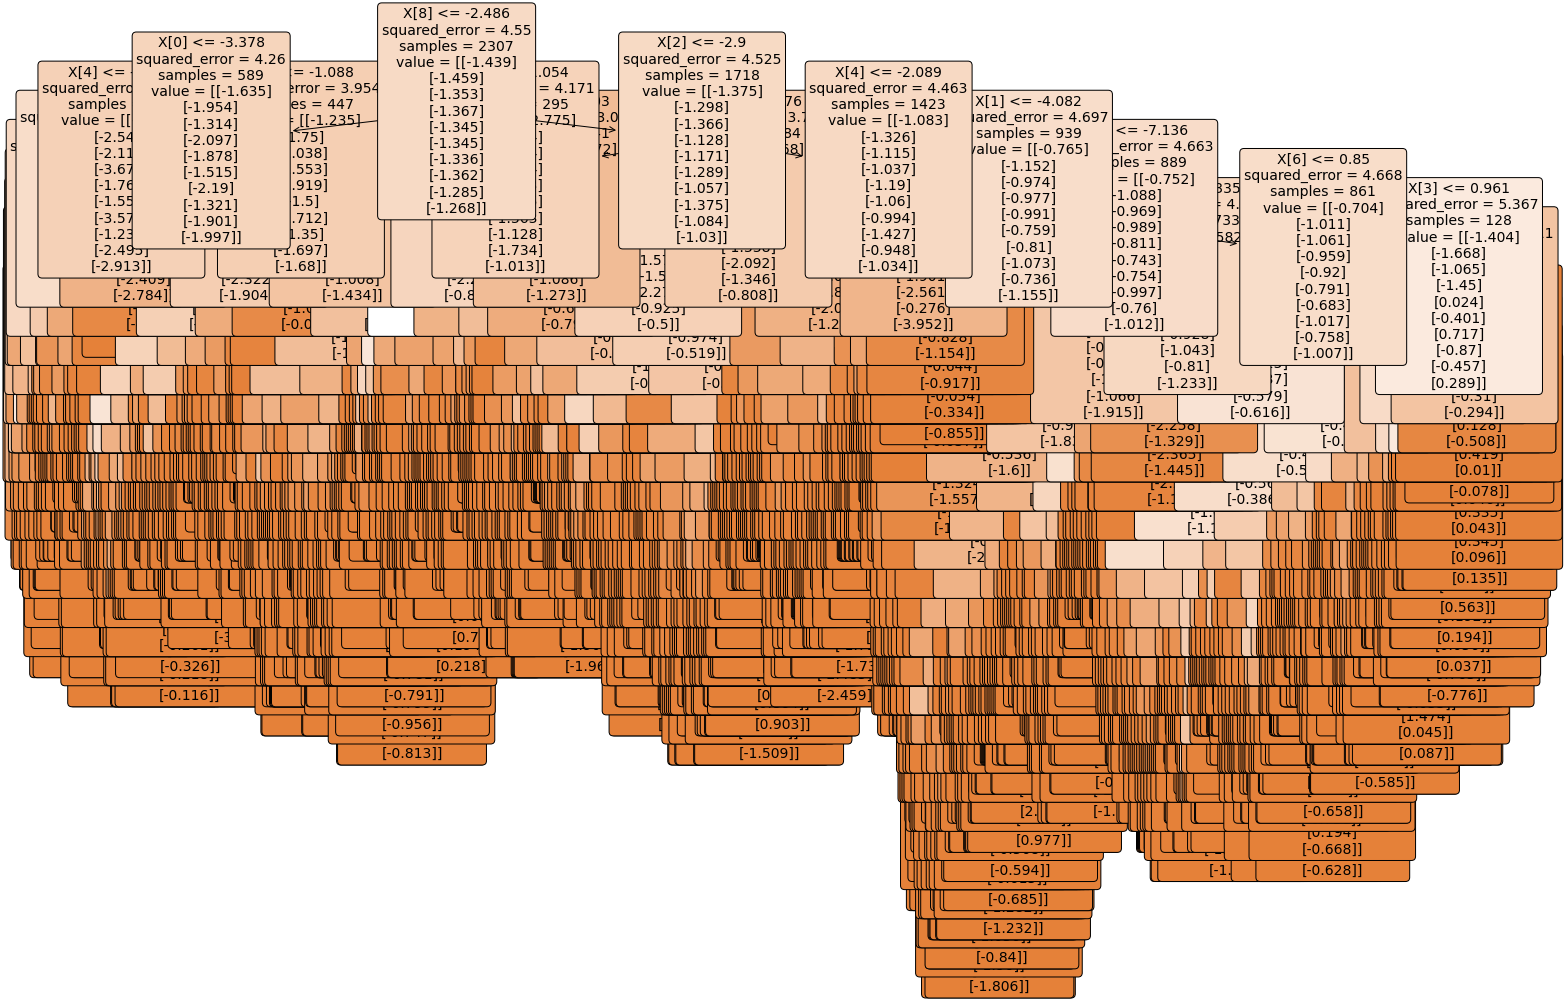

In [21]:
import pydot
# Pull out one tree from the forest
Tree = model.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [22]:
##### Step 5 - Print Performance Summary

In [23]:
print("")
print('-------------------- Model Summary --------------------')
model2.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
print("Too many parameters to print but you can use the code provided if needed")
print("")
#for layer in model.layers:
#    print(layer.name)
#    for item in layer.get_weights():
#        print("  ", item)
#print("")

# Print the last value in the evaluation metrics contained within history file
print('-------------------- Evaluation on Training Data --------------------')
for item in history.history:
    print("Final", item, ":", history.history[item][-1])
print("")

# Evaluate the model on the test data using "evaluate"
print('-------------------- Evaluation on Test Data --------------------')
results = model2.evaluate(X_test, Y_test)
print("")


-------------------- Model Summary --------------------


NameError: name 'model2' is not defined